<a href="https://colab.research.google.com/github/gustavo-mota/Bird-x-Cat/blob/main/BirdxCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.1.0

Uninstalling scipy-1.4.1:
  Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 31.2MB 143kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import h5py
from PIL import Image
import glob # reading all files iteration
import errno
import time # mensure program time execution
import scipy as sc
from scipy import ndimage

%matplotlib inline

In [ ]:
sc.__version__

'1.1.0'

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
# define used activation fucntion
def sigmoid(x):
  return 1/(1 + np.exp(-x)) # estava erado

# define linear equation
def linear_forward(w, x, b):
  return np.dot(w.T,x) + b

In [ ]:
# define sigmoid backward

# define linear backward
def linear_backward_w(A, Y, X, m):
  return 1/m * np.dot(X, (A - Y).T) # confirmar

def linear_backward_b(A, Y, m):
  return 1/m * np.sum(A - Y)

In [ ]:
def Cost(a, y, m=len(Y)):
  return (-1/m)*np.sum(-Y*np.log(a)+(1-Y)*np.log(1-a))

In [ ]:
def foward_propagation(W, X, b, m, Y):
  linear = linear_forward(W,X,b)
  y = sigmoid(linear)
  #a = 1 if y > acti else 0 # essa predição não é agora
  a = y

  #cost = Cost(a, y, m)
  cost = (-1/m)*np.sum(-Y*np.log(a)+(1-Y)*np.log(1-a))
  return a, cost

def backward_propagation(X, Y, cache, m):
  W = cache['W']
  b = cache['b']
  a = cache['a']

  W_Grad = linear_backward_w(a, Y, X, m)
  B_Grad = linear_backward_b(a, Y, m)

  W = W - alpha * W_Grad
  b = b - alpha * B_Grad

  return W, b

In [ ]:
def iteration(X, Y, alpha, iterations, limit, cute):
  W = np.zeros((X.shape[0], 1)) # próprio do modelo
  Wh = np.random.randn(lX.shape[0], 1) * np.sqrt(2/layers_dims[l-1]) # He initialization
  # deve ser assim para ser possíível transpor
  # chalenge: do the above with random numbers
  # chalenge: do the above with initialization
  
  #assert W.shape == (X.shape[0],1)
  print(W.shape)

  b = 0 # deverisa ser 1 né
  costs = []
  caches = []

  for i in range (iterations):
    last_w = W
    last_b = b
    a, cost = foward_propagation(W, X, b, X.shape[1], Y)
    costs.append(cost)
    cache = {"W": W, "b": b, "a":a}
    caches.append(cache)
    W, b = backward_propagation(X, Y, cache, X.shape[1])

    '''if abs(last_w - W) < limit and abs(last_b - b) < limit:
      break'''
  
  pack = {'W': W, "b": b, "Costs": costs, "Caches":caches, "Iterations": i, "Limit": limit, "Cut": cute}
  return pack


In [ ]:
def predict(pack, X):
  W = pack['W']
  b = pack['b']
  cut = pack['Cut']
  pred = np.zeros((1, X.shape[1])) # X.shape deve retornar os exemplos  212
  A = sigmoid(linear_forward(W, X,b))

  for i in range(A.shape[1]):
    pred[0, i] = 1 if A.T[i, 0] > cut else 0
  return pred

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Lolita_x_Miolo/data_saida/dataset.csv')
dataset.shape

(12288, 265)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53.1,54.1,55.1,56.1,57.1,58.1,59.1,60.1,61.1,62.1,63.1,64.1,65.1,66.1,67.1,68.1,69.1,70.1,71.1,72.1,73.1,74.1,75.1,76.1,77.1,78.1,79.1,80.1,81.1,82.1,83.1,84.1,85.1,86.1,87.1,88.1,89.1,90.1,91.1,92.1
0,34,193,193,169,165,42,255,59,183,55,15,190,252,53,39,126,243,12,58,36,151,89,3,50,154,232,114,88,112,69,13,118,13,255,22,71,11,48,255,96,...,3,133,45,110,94,212,34,134,75,111,133,129,153,146,143,48,211,249,48,162,19,249,48,190,164,80,9,202,245,252,253,172,176,139,219,6,81,179,192,28
1,28,195,198,175,173,19,255,46,195,32,12,176,252,27,44,166,181,9,34,30,154,129,3,21,157,228,115,96,130,34,11,140,15,255,23,43,12,51,255,122,...,1,53,19,105,83,225,9,157,60,102,130,127,144,144,138,50,206,249,47,169,18,253,48,210,182,80,3,213,247,254,255,176,175,143,223,5,80,179,193,27
2,31,194,196,172,176,20,255,30,181,24,11,157,251,16,46,157,174,5,23,21,149,116,3,19,156,223,105,88,120,28,10,125,16,255,11,30,11,52,255,110,...,2,60,19,95,80,231,15,149,56,89,138,132,154,153,144,60,201,249,53,171,32,254,53,216,196,78,12,220,250,254,254,182,178,129,230,8,85,180,195,28
3,26,191,193,168,165,41,253,65,185,57,15,191,254,63,60,124,252,42,53,33,155,90,3,50,146,255,115,89,112,62,13,120,13,255,22,68,11,41,254,95,...,3,131,45,111,92,219,35,133,80,106,130,128,151,146,143,29,211,250,45,147,21,244,49,197,171,83,7,217,254,248,248,172,176,140,231,12,79,178,191,27
4,22,195,197,174,174,21,248,53,196,39,12,178,254,33,74,165,207,47,27,31,157,128,3,24,153,254,115,98,129,37,13,143,15,255,23,46,12,45,251,120,...,2,50,18,105,81,232,10,158,65,98,128,126,142,143,137,33,206,250,48,158,17,248,50,216,186,81,3,230,254,251,251,174,175,144,234,10,79,179,194,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,181,195,180,56,71,16,165,47,31,10,37,31,72,8,147,40,148,146,7,223,218,150,48,6,147,124,255,67,135,11,29,89,8,120,115,13,55,76,166,127,...,28,117,143,152,9,35,21,112,17,9,28,22,101,77,94,12,105,98,15,15,38,181,137,175,183,16,153,192,190,186,184,14,23,71,142,155,12,146,24,16
12284,177,194,175,39,55,16,144,42,16,10,55,12,67,11,147,50,129,160,11,226,213,149,78,9,146,87,255,75,130,18,38,81,9,97,101,17,68,58,135,122,...,10,112,155,167,21,25,11,105,32,19,37,29,98,79,95,15,103,96,17,16,25,172,131,169,177,16,157,186,188,181,178,12,16,68,141,156,14,148,27,17
12285,182,190,171,113,135,24,164,60,55,21,48,97,63,25,145,58,147,135,17,255,216,143,47,12,141,93,255,35,136,28,29,92,7,115,170,21,29,131,163,123,...,92,112,140,154,9,41,77,154,13,9,29,30,107,86,100,12,102,104,14,23,50,179,117,175,187,34,148,188,189,182,187,21,39,80,136,153,14,142,13,19
12286,182,194,172,58,75,17,167,43,31,10,53,30,65,10,146,57,149,138,8,255,221,146,52,7,147,101,255,33,128,13,28,85,5,121,141,11,35,76,166,122,...,25,111,142,153,9,34,23,112,15,8,26,25,101,77,95,10,98,101,12,14,36,182,119,174,182,17,152,191,191,186,185,14,21,72,143,155,12,145,11,15


In [ ]:
image = dataset.iloc[:,0]
image

0         34
1         28
2         31
3         26
4         22
        ... 
12283    181
12284    177
12285    182
12286    182
12287    181
Name: 0, Length: 12288, dtype: int64

[[[ 34  28  31]
  [ 26  22  23]
  [ 29  25  26]
  ...
  [180 182 178]
  [179 180 177]
  [177 178 175]]

 [[ 33  27  28]
  [ 27  23  23]
  [ 27  23  24]
  ...
  [185 187 182]
  [179 182 178]
  [180 182 179]]

 [[ 33  27  26]
  [ 29  24  24]
  [ 26  22  22]
  ...
  [186 188 182]
  [184 186 182]
  [178 179 177]]

 ...

 [[ 64  11  16]
  [ 60  11  15]
  [ 52  10  13]
  ...
  [180 179 174]
  [180 180 176]
  [182 182 182]]

 [[ 55  10  13]
  [ 50   9  11]
  [ 50   9  13]
  ...
  [178 178 173]
  [179 180 175]
  [182 183 180]]

 [[ 56  11  15]
  [ 50  10  12]
  [ 49   9  12]
  ...
  [180 179 174]
  [181 181 177]
  [182 182 181]]]


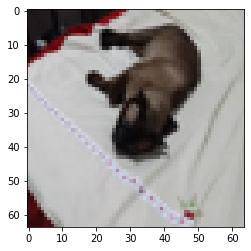

In [ ]:
plt.imshow(np.array(image).reshape(64,64,3))
print(np.array(image).reshape(64,64,3))

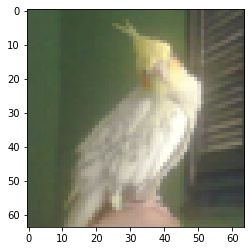

In [ ]:
img = dataset.iloc[:,172]
plt.imshow(np.array(img).reshape(64,64,3))

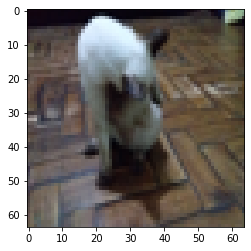

In [ ]:
img = dataset.iloc[:,171]
plt.imshow(np.array(img).reshape(64,64,3))

In [ ]:
img = dataset.iloc[:-1,171]
#print(img, np.array(img).reshape(64,64,3))
plt.imshow(np.array(img).reshape(64,64,3))
plt.show()

ValueError: ignored

In [ ]:
img = dataset.iloc[:-1,171]
#print(img, np.array(img).reshape(64,64,3))
plt.imshow(np.array(img).reshape(64,64,3).astype(int))
plt.show()

ValueError: ignored

In [ ]:
'''
  Optional Correction
    No Y line
    Insert the values ones
    new dataset should already has
'''

output_miolo = np.ones(172)
output_lolita = np.zeros(93)

row = np.concatenate([output_miolo, output_lolita], axis=None)
#row = pd.Series(row).T
#dataset.append(pd.DataFrame(row).T, ignore_index=True)
dataset = dataset.append(pd.DataFrame(row.reshape(1,-1), columns=list(dataset)), ignore_index=True)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53.1,54.1,55.1,56.1,57.1,58.1,59.1,60.1,61.1,62.1,63.1,64.1,65.1,66.1,67.1,68.1,69.1,70.1,71.1,72.1,73.1,74.1,75.1,76.1,77.1,78.1,79.1,80.1,81.1,82.1,83.1,84.1,85.1,86.1,87.1,88.1,89.1,90.1,91.1,92.1
0,34.0,193.0,193.0,169.0,165.0,42.0,255.0,59.0,183.0,55.0,15.0,190.0,252.0,53.0,39.0,126.0,243.0,12.0,58.0,36.0,151.0,89.0,3.0,50.0,154.0,232.0,114.0,88.0,112.0,69.0,13.0,118.0,13.0,255.0,22.0,71.0,11.0,48.0,255.0,96.0,...,3.0,133.0,45.0,110.0,94.0,212.0,34.0,134.0,75.0,111.0,133.0,129.0,153.0,146.0,143.0,48.0,211.0,249.0,48.0,162.0,19.0,249.0,48.0,190.0,164.0,80.0,9.0,202.0,245.0,252.0,253.0,172.0,176.0,139.0,219.0,6.0,81.0,179.0,192.0,28.0
1,28.0,195.0,198.0,175.0,173.0,19.0,255.0,46.0,195.0,32.0,12.0,176.0,252.0,27.0,44.0,166.0,181.0,9.0,34.0,30.0,154.0,129.0,3.0,21.0,157.0,228.0,115.0,96.0,130.0,34.0,11.0,140.0,15.0,255.0,23.0,43.0,12.0,51.0,255.0,122.0,...,1.0,53.0,19.0,105.0,83.0,225.0,9.0,157.0,60.0,102.0,130.0,127.0,144.0,144.0,138.0,50.0,206.0,249.0,47.0,169.0,18.0,253.0,48.0,210.0,182.0,80.0,3.0,213.0,247.0,254.0,255.0,176.0,175.0,143.0,223.0,5.0,80.0,179.0,193.0,27.0
2,31.0,194.0,196.0,172.0,176.0,20.0,255.0,30.0,181.0,24.0,11.0,157.0,251.0,16.0,46.0,157.0,174.0,5.0,23.0,21.0,149.0,116.0,3.0,19.0,156.0,223.0,105.0,88.0,120.0,28.0,10.0,125.0,16.0,255.0,11.0,30.0,11.0,52.0,255.0,110.0,...,2.0,60.0,19.0,95.0,80.0,231.0,15.0,149.0,56.0,89.0,138.0,132.0,154.0,153.0,144.0,60.0,201.0,249.0,53.0,171.0,32.0,254.0,53.0,216.0,196.0,78.0,12.0,220.0,250.0,254.0,254.0,182.0,178.0,129.0,230.0,8.0,85.0,180.0,195.0,28.0
3,26.0,191.0,193.0,168.0,165.0,41.0,253.0,65.0,185.0,57.0,15.0,191.0,254.0,63.0,60.0,124.0,252.0,42.0,53.0,33.0,155.0,90.0,3.0,50.0,146.0,255.0,115.0,89.0,112.0,62.0,13.0,120.0,13.0,255.0,22.0,68.0,11.0,41.0,254.0,95.0,...,3.0,131.0,45.0,111.0,92.0,219.0,35.0,133.0,80.0,106.0,130.0,128.0,151.0,146.0,143.0,29.0,211.0,250.0,45.0,147.0,21.0,244.0,49.0,197.0,171.0,83.0,7.0,217.0,254.0,248.0,248.0,172.0,176.0,140.0,231.0,12.0,79.0,178.0,191.0,27.0
4,22.0,195.0,197.0,174.0,174.0,21.0,248.0,53.0,196.0,39.0,12.0,178.0,254.0,33.0,74.0,165.0,207.0,47.0,27.0,31.0,157.0,128.0,3.0,24.0,153.0,254.0,115.0,98.0,129.0,37.0,13.0,143.0,15.0,255.0,23.0,46.0,12.0,45.0,251.0,120.0,...,2.0,50.0,18.0,105.0,81.0,232.0,10.0,158.0,65.0,98.0,128.0,126.0,142.0,143.0,137.0,33.0,206.0,250.0,48.0,158.0,17.0,248.0,50.0,216.0,186.0,81.0,3.0,230.0,254.0,251.0,251.0,174.0,175.0,144.0,234.0,10.0,79.0,179.0,194.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,177.0,194.0,175.0,39.0,55.0,16.0,144.0,42.0,16.0,10.0,55.0,12.0,67.0,11.0,147.0,50.0,129.0,160.0,11.0,226.0,213.0,149.0,78.0,9.0,146.0,87.0,255.0,75.0,130.0,18.0,38.0,81.0,9.0,97.0,101.0,17.0,68.0,58.0,135.0,122.0,...,10.0,112.0,155.0,167.0,21.0,25.0,11.0,105.0,32.0,19.0,37.0,29.0,98.0,79.0,95.0,15.0,103.0,96.0,17.0,16.0,25.0,172.0,131.0,169.0,177.0,16.0,157.0,186.0,188.0,181.0,178.0,12.0,16.0,68.0,141.0,156.0,14.0,148.0,27.0,17.0
12285,182.0,190.0,171.0,113.0,135.0,24.0,164.0,60.0,55.0,21.0,48.0,97.0,63.0,25.0,145.0,58.0,147.0,135.0,17.0,255.0,216.0,143.0,47.0,12.0,141.0,93.0,255.0,35.0,136.0,28.0,29.0,92.0,7.0,115.0,170.0,21.0,29.0,131.0,163.0,123.0,...,92.0,112.0,140.0,154.0,9.0,41.0,77.0,154.0,13.0,9.0,29.0,30.0,107.0,86.0,100.0,12.0,102.0,104.0,14.0,23.0,50.0,179.0,117.0,175.0,187.0,34.0,148.0,188.0,189.0,182.0,187.0,21.0,39.0,80.0,136.0,153.0,14.0,142.0,13.0,19.0
12286,182.0,194.0,172.0,58.0,75.0,17.0,167.0,43.0,31.0,10.0,53.0,30.0,65.0,10.0,146.0,57.0,149.0,138.0,8.0,255.0,221.0,146.0,52.0,7.0,147.0,101.0,255.0,33.0,128.0,13.0,28.0,85.0,5.0,121.0,141.0,11.0,35.0,76.0,166.0,122.0,...,25.0,111.0,142

0.0


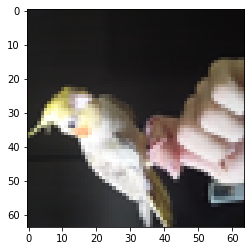

In [ ]:
ahsjs = -1
plt.imshow(np.array(dataset.iloc[:-1,ahsjs].astype(int)).reshape(64,64,3))
print(dataset.iloc[-1,ahsjs])

In [ ]:
dataset.iloc[12288, 171]

1.0

In [ ]:
shuffle = dataset.reindex(columns=np.random.permutation(dataset.columns)) # tornou os numeros em float
np.random.permutation(dataset.columns) # testing

In [ ]:
shuffle

,115,52.1,48,63,90,91,153,87.1,113,119,124,24.1,5,13.1,17,23.1,139,92.1,74,25.1,59,158,78.1,80.1,156,40.1,46,105,14.1,75,100,166,34.1,61,169,157,138,159,126,6,...,60.1,26,145,92,33.1,110,36.1,67.1,130,171,118,4.1,60,129,31,54,142,23,35,22.1,2,128,84.1,15,72.1,35.1,11,1,68.1,117,20.1,98,150,103,91.1,15.1,45,87,127,70.1
0,69.0,79.0,166.0,55.0,42.0,47.0,152.0,219.0,73.0,134.0,166.0,131.0,42.0,80.0,12.0,158.0,156.0,28.0,54.0,40.0,131.0,89.0,80.0,202.0,65.0,235.0,116.0,72.0,98.0,157.0,54.0,20.0,41.0,27.0,89.0,125.0,78.0,12.0,82.0,255.0,...,134.0,114.0,68.0,60.0,35.0,64.0,46.0,143.0,16.0,20.0,198.0,25.0,128.0,138.0,118.0,123.0,75.0,50.0,71.0,50.0,193.0,176.0,172.0,126.0,162.0,38.0,190.0,193.0,48.0,164.0,38.0,55.0,75.0,18.0,192.0,73.0,62.0,52.0,61.0,249.0
1,57.0,110.0,166.0,34.0,16.0,30.0,164.0,223.0,54.0,144.0,168.0,131.0,19.0,57.0,9.0,153.0,162.0,27.0,27.0,75.0,138.0,77.0,80.0,213.0,51.0,239.0,118.0,47.0,104.0,154.0,34.0,6.0,41.0,28.0,79.0,140.0,57.0,4.0,61.0,255.0,...,157.0,115.0,51.0,26.0,24.0,50.0,42.0,138.0,4.0,5.0,201.0,20.0,207.0,143.0,140.0,130.0,68.0,21.0,43.0,48.0,198.0,180.0,176.0,166.0,169.0,42.0,176.0,195.0,50.0,167.0,64.0,49.0,49.0,4.0,193.0,62.0,38.0,34.0,36.0,249.0
2,47.0,100.0,164.0,21.0,12.0,29.0,142.0,230.0,55.0,157.0,157.0,138.0,20.0,16.0,5.0,159.0,169.0,28.0,18.0,49.0,121.0,61.0,78.0,220.0,38.0,207.0,104.0,43.0,98.0,147.0,25.0,19.0,22.0,22.0,69.0,151.0,45.0,13.0,49.0,255.0,...,149.0,105.0,39.0,22.0,14.0,50.0,27.0,144.0,14.0,16.0,198.0,23.0,187.0,158.0,125.0,128.0,61.0,19.0,30.0,54.0,196.0,181.0,182.0,157.0,171.0,29.0,157.0,194.0,60.0,158.0,43.0,41.0,39.0,15.0,195.0,60.0,29.0,32.0,33.0,249.0
3,76.0,81.0,167.0,55.0,46.0,46.0,134.0,231.0,55.0,133.0,166.0,134.0,41.0,70.0,42.0,157.0,158.0,27.0,57.0,32.0,127.0,94.0,83.0,217.0,60.0,236.0,113.0,66.0,97.0,155.0,52.0,15.0,42.0,31.0,98.0,126.0,77.0,27.0,82.0,253.0,...,133.0,115.0,51.0,60.0,35.0,60.0,42.0,143.0,15.0,17.0,199.0,25.0,117.0,133.0,120.0,128.0,72.0,50.0,68.0,50.0,193.0,175.0,172.0,124.0,147.0,34.0,191.0,191.0,29.0,167.0,33.0,58.0,71.0,19.0,191.0,74.0,57.0,45.0,63.0,250.0
4,64.0,117.0,166.0,36.0,17.0,31.0,148.0,234.0,45.0,144.0,171.0,131.0,21.0,46.0,47.0,153.0,163.0,28.0,30.0,70.0,138.0,90.0,81.0,230.0,47.0,240.0,118.0,45.0,102.0,152.0,33.0,5.0,43.0,29.0,90.0,141.0,60.0,21.0,65.0,248.0,...,158.0,115.0,39.0,32.0,24.0,46.0,43.0,137.0,3.0,5.0,201.0,19.0,208.0,145.0,143.0,137.0,65.0,24.0,46.0,46.0,197.0,179.0,174.0,165.0,158.0,39.0,178.0,195.0,33.0,169.0,66.0,53.0,48.0,10.0,194.0,65.0,37.0,31.0,43.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,43.0,255.0,158.0,6.0,211.0,30.0,24.0,141.0,21.0,28.0,180.0,25.0,16.0,125.0,160.0,38.0,33.0,17.0,15.0,91.0,214.0,30.0,16.0,186.0,28.0,124.0,75.0,31.0,62.0,219.0,39.0,71.0,24.0,84.0,32.0,22.0,30.0,23.0,182.0,144.0,...,105.0,255.0,71.0,9.0,7.0,15.0,35.0,95.0,106.0,79.0,211.0,22.0,222.0,32.0,81.0,11.0,98.0,9.0,17.0,38.0,175.0,73.0,12.0,50.0,16.0,15.0,12.0,194.0,15.0,195.0,15.0,38.0,37.0,115.0,27.0,85.0,31.0,127.0,89.0,96.0
12285,60.0,184.0,164.0,3.0,215.0,44.0,44.0,136.0,38.0,31.0,199.0,22.0,24.0,175.0,135.0,26.0,53.0,19.0,15.0,74.0,213.0,44.0,34.0,188.0,69.0,165.0,111.0,57.0,61.0,224.0,57.0,104.0,25.0,135.0,49.0,42.0,54.0,30.0,160.0,164.0,...,154.0,255.0,73.0,13.0,16.0,15.0,26.0,100.0,94.0,95.0,211.0,29.0,111.0,35.0,92.0,13.0,89.0,12.0,21.0,31.0,171.0,167.0,21.0,58.0,23.0,17.0,97.0,190.0,12.0,215.0,15.0,63.0,66.0,102.0,13.0,107.0,44.0,104.0,78.0,104.0
12286,66.0,168.0,162.0,1.0,215.0,39.0,31.0,143.0,34.0,28.0,172.0,14.0,17.0,133.0,138.0,22.0,36.0,15.0,7.0,80.0,213.0,34.0,17.0,191.0,39.0,167.0,89.0,40.0,64.0,228.0,49.0,95.0,26.0,141.0,37.0,23.0,43.0,22.0,175.0,167.0,...,112.0,255.0,64.0,8.0,11.0,15.0,27.0,95.0,99.0,92.0,209.0,26.0,180.0,26.0,

In [ ]:
train_set = shuffle.iloc[:,:212]
#train_set = shuffle.reindex(columns=np.random.permutation(train_set.columns))
#train_set = train_set[train_set.columns].applymap(int)
test_set = shuffle.iloc[:,212:]#.applymap(int)

In [ ]:
train_set
#test_set

,115,52.1,48,63,90,91,153,87.1,113,119,124,24.1,5,13.1,17,23.1,139,92.1,74,25.1,59,158,78.1,80.1,156,40.1,46,105,14.1,75,100,166,34.1,61,169,157,138,159,126,6,...,76.1,84,46.1,64,102,168,67,90.1,45.1,73.1,7,10.1,107,75.1,62,24,18,33,30.1,94,17.1,85,133,146,131,106,96,134,71.1,10,136,89,125,56,5.1,34,47,21.1,27,8
0,69.0,79.0,166.0,55.0,42.0,47.0,152.0,219.0,73.0,134.0,166.0,131.0,42.0,80.0,12.0,158.0,156.0,28.0,54.0,40.0,131.0,89.0,80.0,202.0,65.0,235.0,116.0,72.0,98.0,157.0,54.0,20.0,41.0,27.0,89.0,125.0,78.0,12.0,82.0,255.0,...,190.0,63.0,74.0,48.0,59.0,22.0,189.0,179.0,183.0,19.0,59.0,30.0,71.0,48.0,59.0,154.0,58.0,255.0,44.0,59.0,28.0,58.0,143.0,142.0,172.0,61.0,79.0,151.0,48.0,15.0,35.0,8.0,42.0,61.0,26.0,22.0,123.0,25.0,88.0,183.0
1,57.0,110.0,166.0,34.0,16.0,30.0,164.0,223.0,54.0,144.0,168.0,131.0,19.0,57.0,9.0,153.0,162.0,27.0,27.0,75.0,138.0,77.0,80.0,213.0,51.0,239.0,118.0,47.0,104.0,154.0,34.0,6.0,41.0,28.0,79.0,140.0,57.0,4.0,61.0,255.0,...,210.0,48.0,38.0,30.0,41.0,4.0,193.0,179.0,220.0,18.0,46.0,22.0,54.0,48.0,47.0,157.0,34.0,255.0,36.0,35.0,57.0,49.0,148.0,144.0,185.0,51.0,64.0,156.0,47.0,12.0,28.0,3.0,35.0,48.0,22.0,23.0,137.0,56.0,96.0,195.0
2,47.0,100.0,164.0,21.0,12.0,29.0,142.0,230.0,55.0,157.0,157.0,138.0,20.0,16.0,5.0,159.0,169.0,28.0,18.0,49.0,121.0,61.0,78.0,220.0,38.0,207.0,104.0,43.0,98.0,147.0,25.0,19.0,22.0,22.0,69.0,151.0,45.0,13.0,49.0,255.0,...,216.0,45.0,23.0,27.0,39.0,15.0,195.0,180.0,238.0,32.0,30.0,27.0,45.0,53.0,42.0,156.0,23.0,255.0,25.0,30.0,40.0,55.0,156.0,146.0,196.0,42.0,44.0,157.0,53.0,11.0,32.0,9.0,33.0,49.0,22.0,11.0,137.0,35.0,88.0,181.0
3,76.0,81.0,167.0,55.0,46.0,46.0,134.0,231.0,55.0,133.0,166.0,134.0,41.0,70.0,42.0,157.0,158.0,27.0,57.0,32.0,127.0,94.0,83.0,217.0,60.0,236.0,113.0,66.0,97.0,155.0,52.0,15.0,42.0,31.0,98.0,126.0,77.0,27.0,82.0,253.0,...,197.0,69.0,73.0,54.0,54.0,16.0,190.0,178.0,182.0,21.0,65.0,28.0,66.0,49.0,60.0,146.0,53.0,255.0,46.0,63.0,22.0,68.0,139.0,143.0,172.0,65.0,85.0,151.0,45.0,15.0,37.0,6.0,41.0,63.0,25.0,22.0,124.0,24.0,89.0,185.0
4,64.0,117.0,166.0,36.0,17.0,31.0,148.0,234.0,45.0,144.0,171.0,131.0,21.0,46.0,47.0,153.0,163.0,28.0,30.0,70.0,138.0,90.0,81.0,230.0,47.0,240.0,118.0,45.0,102.0,152.0,33.0,5.0,43.0,29.0,90.0,141.0,60.0,21.0,65.0,248.0,...,216.0,58.0,39.0,34.0,40.0,5.0,194.0,179.0,219.0,17.0,53.0,22.0,52.0,50.0,47.0,153.0,27.0,255.0,37.0,44.0,60.0,54.0,151.0,145.0,186.0,60.0,78.0,158.0,48.0,12.0,26.0,2.0,35.0,47.0,20.0,23.0,139.0,61.0,98.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,43.0,255.0,158.0,6.0,211.0,30.0,24.0,141.0,21.0,28.0,180.0,25.0,16.0,125.0,160.0,38.0,33.0,17.0,15.0,91.0,214.0,30.0,16.0,186.0,28.0,124.0,75.0,31.0,62.0,219.0,39.0,71.0,24.0,84.0,32.0,22.0,30.0,23.0,182.0,144.0,...,169.0,133.0,98.0,134.0,33.0,57.0,82.0,148.0,97.0,25.0,42.0,22.0,35.0,131.0,28.0,146.0,11.0,97.0,12.0,27.0,17.0,190.0,87.0,50.0,25.0,44.0,42.0,151.0,17.0,55.0,7.0,42.0,49.0,14.0,15.0,101.0,16.0,61.0,75.0,16.0
12285,60.0,184.0,164.0,3.0,215.0,44.0,44.0,136.0,38.0,31.0,199.0,22.0,24.0,175.0,135.0,26.0,53.0,19.0,15.0,74.0,213.0,44.0,34.0,188.0,69.0,165.0,111.0,57.0,61.0,224.0,57.0,104.0,25.0,135.0,49.0,42.0,54.0,30.0,160.0,164.0,...,175.0,105.0,149.0,93.0,50.0,76.0,176.0,142.0,151.0,50.0,60.0,33.0,54.0,117.0,57.0,141.0,17.0,115.0,23.0,46.0,12.0,160.0,111.0,137.0,29.0,66.0,56.0,152.0,14.0,48.0,3.0,10.0,60.0,7.0,21.0,170.0,18.0,57.0,35.0,55.0
12286,66.0,168.0,162.0,1.0,215.0,39.0,31.0,143.0,34.0,28.0,172.0,14.0,17.0,133.0,138.0,22.0,36.0,15.0,7.0,80.0,213.0,34.0,17.0,191.0,39.0,167.0,89.0,40.0,64.0,228.0,49.0,95.0,26.0,141.0,37.0,23.0,43.0,22.0,175.0,167.0,...,174.0,105.0,110.0,94.0,41.0,78.0,109.0,145.0,88.0,36.0,43.0,32.0,41.0,119.0,41.0,147.0,8.0,121.0,18.0,33.0,9.0,

In [ ]:
# teste se háá repetiçãão de imagens

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(12289, 265)


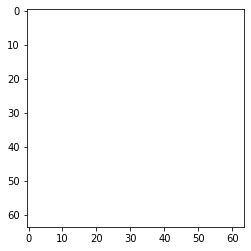

0.0


In [ ]:
plt.imshow(np.array(dataset.iloc[:12288,172]).reshape(64, 64, 3))
print(dataset.shape)
plt.show()
print(dataset.iloc[-1, 172])

In [ ]:
Y = train_set.iloc[-1, :]
Y

115     1.0
52.1    0.0
48      1.0
63      1.0
90      1.0
       ... 
34      1.0
47      1.0
21.1    0.0
27      1.0
8       1.0
Name: 12288, Length: 212, dtype: float64

In [ ]:
train_set_Y = np.array(train_set.iloc[-1, :])
test_set_Y = np.array(test_set.iloc[-1,:])
print(train_set_Y, "\n\n", test_set_Y)

[1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.] 

 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0.]


In [ ]:
train_set

,115,52.1,48,63,90,91,153,87.1,113,119,124,24.1,5,13.1,17,23.1,139,92.1,74,25.1,59,158,78.1,80.1,156,40.1,46,105,14.1,75,100,166,34.1,61,169,157,138,159,126,6,...,76.1,84,46.1,64,102,168,67,90.1,45.1,73.1,7,10.1,107,75.1,62,24,18,33,30.1,94,17.1,85,133,146,131,106,96,134,71.1,10,136,89,125,56,5.1,34,47,21.1,27,8
0,69.0,79.0,166.0,55.0,42.0,47.0,152.0,219.0,73.0,134.0,166.0,131.0,42.0,80.0,12.0,158.0,156.0,28.0,54.0,40.0,131.0,89.0,80.0,202.0,65.0,235.0,116.0,72.0,98.0,157.0,54.0,20.0,41.0,27.0,89.0,125.0,78.0,12.0,82.0,255.0,...,190.0,63.0,74.0,48.0,59.0,22.0,189.0,179.0,183.0,19.0,59.0,30.0,71.0,48.0,59.0,154.0,58.0,255.0,44.0,59.0,28.0,58.0,143.0,142.0,172.0,61.0,79.0,151.0,48.0,15.0,35.0,8.0,42.0,61.0,26.0,22.0,123.0,25.0,88.0,183.0
1,57.0,110.0,166.0,34.0,16.0,30.0,164.0,223.0,54.0,144.0,168.0,131.0,19.0,57.0,9.0,153.0,162.0,27.0,27.0,75.0,138.0,77.0,80.0,213.0,51.0,239.0,118.0,47.0,104.0,154.0,34.0,6.0,41.0,28.0,79.0,140.0,57.0,4.0,61.0,255.0,...,210.0,48.0,38.0,30.0,41.0,4.0,193.0,179.0,220.0,18.0,46.0,22.0,54.0,48.0,47.0,157.0,34.0,255.0,36.0,35.0,57.0,49.0,148.0,144.0,185.0,51.0,64.0,156.0,47.0,12.0,28.0,3.0,35.0,48.0,22.0,23.0,137.0,56.0,96.0,195.0
2,47.0,100.0,164.0,21.0,12.0,29.0,142.0,230.0,55.0,157.0,157.0,138.0,20.0,16.0,5.0,159.0,169.0,28.0,18.0,49.0,121.0,61.0,78.0,220.0,38.0,207.0,104.0,43.0,98.0,147.0,25.0,19.0,22.0,22.0,69.0,151.0,45.0,13.0,49.0,255.0,...,216.0,45.0,23.0,27.0,39.0,15.0,195.0,180.0,238.0,32.0,30.0,27.0,45.0,53.0,42.0,156.0,23.0,255.0,25.0,30.0,40.0,55.0,156.0,146.0,196.0,42.0,44.0,157.0,53.0,11.0,32.0,9.0,33.0,49.0,22.0,11.0,137.0,35.0,88.0,181.0
3,76.0,81.0,167.0,55.0,46.0,46.0,134.0,231.0,55.0,133.0,166.0,134.0,41.0,70.0,42.0,157.0,158.0,27.0,57.0,32.0,127.0,94.0,83.0,217.0,60.0,236.0,113.0,66.0,97.0,155.0,52.0,15.0,42.0,31.0,98.0,126.0,77.0,27.0,82.0,253.0,...,197.0,69.0,73.0,54.0,54.0,16.0,190.0,178.0,182.0,21.0,65.0,28.0,66.0,49.0,60.0,146.0,53.0,255.0,46.0,63.0,22.0,68.0,139.0,143.0,172.0,65.0,85.0,151.0,45.0,15.0,37.0,6.0,41.0,63.0,25.0,22.0,124.0,24.0,89.0,185.0
4,64.0,117.0,166.0,36.0,17.0,31.0,148.0,234.0,45.0,144.0,171.0,131.0,21.0,46.0,47.0,153.0,163.0,28.0,30.0,70.0,138.0,90.0,81.0,230.0,47.0,240.0,118.0,45.0,102.0,152.0,33.0,5.0,43.0,29.0,90.0,141.0,60.0,21.0,65.0,248.0,...,216.0,58.0,39.0,34.0,40.0,5.0,194.0,179.0,219.0,17.0,53.0,22.0,52.0,50.0,47.0,153.0,27.0,255.0,37.0,44.0,60.0,54.0,151.0,145.0,186.0,60.0,78.0,158.0,48.0,12.0,26.0,2.0,35.0,47.0,20.0,23.0,139.0,61.0,98.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,43.0,255.0,158.0,6.0,211.0,30.0,24.0,141.0,21.0,28.0,180.0,25.0,16.0,125.0,160.0,38.0,33.0,17.0,15.0,91.0,214.0,30.0,16.0,186.0,28.0,124.0,75.0,31.0,62.0,219.0,39.0,71.0,24.0,84.0,32.0,22.0,30.0,23.0,182.0,144.0,...,169.0,133.0,98.0,134.0,33.0,57.0,82.0,148.0,97.0,25.0,42.0,22.0,35.0,131.0,28.0,146.0,11.0,97.0,12.0,27.0,17.0,190.0,87.0,50.0,25.0,44.0,42.0,151.0,17.0,55.0,7.0,42.0,49.0,14.0,15.0,101.0,16.0,61.0,75.0,16.0
12285,60.0,184.0,164.0,3.0,215.0,44.0,44.0,136.0,38.0,31.0,199.0,22.0,24.0,175.0,135.0,26.0,53.0,19.0,15.0,74.0,213.0,44.0,34.0,188.0,69.0,165.0,111.0,57.0,61.0,224.0,57.0,104.0,25.0,135.0,49.0,42.0,54.0,30.0,160.0,164.0,...,175.0,105.0,149.0,93.0,50.0,76.0,176.0,142.0,151.0,50.0,60.0,33.0,54.0,117.0,57.0,141.0,17.0,115.0,23.0,46.0,12.0,160.0,111.0,137.0,29.0,66.0,56.0,152.0,14.0,48.0,3.0,10.0,60.0,7.0,21.0,170.0,18.0,57.0,35.0,55.0
12286,66.0,168.0,162.0,1.0,215.0,39.0,31.0,143.0,34.0,28.0,172.0,14.0,17.0,133.0,138.0,22.0,36.0,15.0,7.0,80.0,213.0,34.0,17.0,191.0,39.0,167.0,89.0,40.0,64.0,228.0,49.0,95.0,26.0,141.0,37.0,23.0,43.0,22.0,175.0,167.0,...,174.0,105.0,110.0,94.0,41.0,78.0,109.0,145.0,88.0,36.0,43.0,32.0,41.0,119.0,41.0,147.0,8.0,121.0,18.0,33.0,9.0,

In [ ]:
#train_set = train_set.drop(train_set.index[12289])
train_set = train_set.drop(train_set.index[12288])
train_set

,115,52.1,48,63,90,91,153,87.1,113,119,124,24.1,5,13.1,17,23.1,139,92.1,74,25.1,59,158,78.1,80.1,156,40.1,46,105,14.1,75,100,166,34.1,61,169,157,138,159,126,6,...,76.1,84,46.1,64,102,168,67,90.1,45.1,73.1,7,10.1,107,75.1,62,24,18,33,30.1,94,17.1,85,133,146,131,106,96,134,71.1,10,136,89,125,56,5.1,34,47,21.1,27,8
0,69.0,79.0,166.0,55.0,42.0,47.0,152.0,219.0,73.0,134.0,166.0,131.0,42.0,80.0,12.0,158.0,156.0,28.0,54.0,40.0,131.0,89.0,80.0,202.0,65.0,235.0,116.0,72.0,98.0,157.0,54.0,20.0,41.0,27.0,89.0,125.0,78.0,12.0,82.0,255.0,...,190.0,63.0,74.0,48.0,59.0,22.0,189.0,179.0,183.0,19.0,59.0,30.0,71.0,48.0,59.0,154.0,58.0,255.0,44.0,59.0,28.0,58.0,143.0,142.0,172.0,61.0,79.0,151.0,48.0,15.0,35.0,8.0,42.0,61.0,26.0,22.0,123.0,25.0,88.0,183.0
1,57.0,110.0,166.0,34.0,16.0,30.0,164.0,223.0,54.0,144.0,168.0,131.0,19.0,57.0,9.0,153.0,162.0,27.0,27.0,75.0,138.0,77.0,80.0,213.0,51.0,239.0,118.0,47.0,104.0,154.0,34.0,6.0,41.0,28.0,79.0,140.0,57.0,4.0,61.0,255.0,...,210.0,48.0,38.0,30.0,41.0,4.0,193.0,179.0,220.0,18.0,46.0,22.0,54.0,48.0,47.0,157.0,34.0,255.0,36.0,35.0,57.0,49.0,148.0,144.0,185.0,51.0,64.0,156.0,47.0,12.0,28.0,3.0,35.0,48.0,22.0,23.0,137.0,56.0,96.0,195.0
2,47.0,100.0,164.0,21.0,12.0,29.0,142.0,230.0,55.0,157.0,157.0,138.0,20.0,16.0,5.0,159.0,169.0,28.0,18.0,49.0,121.0,61.0,78.0,220.0,38.0,207.0,104.0,43.0,98.0,147.0,25.0,19.0,22.0,22.0,69.0,151.0,45.0,13.0,49.0,255.0,...,216.0,45.0,23.0,27.0,39.0,15.0,195.0,180.0,238.0,32.0,30.0,27.0,45.0,53.0,42.0,156.0,23.0,255.0,25.0,30.0,40.0,55.0,156.0,146.0,196.0,42.0,44.0,157.0,53.0,11.0,32.0,9.0,33.0,49.0,22.0,11.0,137.0,35.0,88.0,181.0
3,76.0,81.0,167.0,55.0,46.0,46.0,134.0,231.0,55.0,133.0,166.0,134.0,41.0,70.0,42.0,157.0,158.0,27.0,57.0,32.0,127.0,94.0,83.0,217.0,60.0,236.0,113.0,66.0,97.0,155.0,52.0,15.0,42.0,31.0,98.0,126.0,77.0,27.0,82.0,253.0,...,197.0,69.0,73.0,54.0,54.0,16.0,190.0,178.0,182.0,21.0,65.0,28.0,66.0,49.0,60.0,146.0,53.0,255.0,46.0,63.0,22.0,68.0,139.0,143.0,172.0,65.0,85.0,151.0,45.0,15.0,37.0,6.0,41.0,63.0,25.0,22.0,124.0,24.0,89.0,185.0
4,64.0,117.0,166.0,36.0,17.0,31.0,148.0,234.0,45.0,144.0,171.0,131.0,21.0,46.0,47.0,153.0,163.0,28.0,30.0,70.0,138.0,90.0,81.0,230.0,47.0,240.0,118.0,45.0,102.0,152.0,33.0,5.0,43.0,29.0,90.0,141.0,60.0,21.0,65.0,248.0,...,216.0,58.0,39.0,34.0,40.0,5.0,194.0,179.0,219.0,17.0,53.0,22.0,52.0,50.0,47.0,153.0,27.0,255.0,37.0,44.0,60.0,54.0,151.0,145.0,186.0,60.0,78.0,158.0,48.0,12.0,26.0,2.0,35.0,47.0,20.0,23.0,139.0,61.0,98.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,61.0,255.0,159.0,1.0,212.0,37.0,27.0,142.0,16.0,26.0,176.0,15.0,16.0,136.0,146.0,23.0,38.0,16.0,9.0,80.0,212.0,27.0,16.0,192.0,37.0,107.0,94.0,36.0,63.0,230.0,54.0,94.0,35.0,78.0,44.0,22.0,32.0,22.0,172.0,165.0,...,175.0,121.0,109.0,112.0,42.0,78.0,108.0,146.0,90.0,38.0,47.0,30.0,38.0,137.0,38.0,147.0,7.0,120.0,14.0,30.0,5.0,184.0,106.0,73.0,21.0,57.0,52.0,151.0,15.0,37.0,2.0,15.0,51.0,3.0,20.0,115.0,15.0,51.0,67.0,31.0
12284,43.0,255.0,158.0,6.0,211.0,30.0,24.0,141.0,21.0,28.0,180.0,25.0,16.0,125.0,160.0,38.0,33.0,17.0,15.0,91.0,214.0,30.0,16.0,186.0,28.0,124.0,75.0,31.0,62.0,219.0,39.0,71.0,24.0,84.0,32.0,22.0,30.0,23.0,182.0,144.0,...,169.0,133.0,98.0,134.0,33.0,57.0,82.0,148.0,97.0,25.0,42.0,22.0,35.0,131.0,28.0,146.0,11.0,97.0,12.0,27.0,17.0,190.0,87.0,50.0,25.0,44.0,42.0,151.0,17.0,55.0,7.0,42.0,49.0,14.0,15.0,101.0,16.0,61.0,75.0,16.0
12285,60.0,184.0,164.0,3.0,215.0,44.0,44.0,136.0,38.0,31.0,199.0,22.0,24.0,175.0,135.0,26.0,53.0,19.0,15.0,74.0,213.0,44.0,34.0,188.0,69.0,165.0,111.0,57.0,61.0,224.0,57.0,104.0,25.0,135.0,49.0,42.0,54.0,30.0,160.0,164.0,...,175.0,105.0,149.0,93.0,50.0,76.0,176.0,142.0,151.0,50.0,60.0,33.0,54.0,117.0,57.0,141.0,17.0,115.0,23.0,46.0,12.0,1

In [ ]:
test_set = test_set.drop(test_set.index[12288])
test_set

,77,61.1,18.1,88.1,74.1,170,163,16.1,51.1,29.1,32.1,83.1,25,60.1,26,145,92,33.1,110,36.1,67.1,130,171,118,4.1,60,129,31,54,142,23,35,22.1,2,128,84.1,15,72.1,35.1,11,1,68.1,117,20.1,98,150,103,91.1,15.1,45,87,127,70.1
0,19.0,75.0,147.0,6.0,249.0,56.0,8.0,95.0,72.0,42.0,65.0,253.0,232.0,134.0,114.0,68.0,60.0,35.0,64.0,46.0,143.0,16.0,20.0,198.0,25.0,128.0,138.0,118.0,123.0,75.0,50.0,71.0,50.0,193.0,176.0,172.0,126.0,162.0,38.0,190.0,193.0,48.0,164.0,38.0,55.0,75.0,18.0,192.0,73.0,62.0,52.0,61.0,249.0
1,6.0,60.0,143.0,5.0,253.0,56.0,3.0,96.0,104.0,34.0,50.0,255.0,228.0,157.0,115.0,51.0,26.0,24.0,50.0,42.0,138.0,4.0,5.0,201.0,20.0,207.0,143.0,140.0,130.0,68.0,21.0,43.0,48.0,198.0,180.0,176.0,166.0,169.0,42.0,176.0,195.0,50.0,167.0,64.0,49.0,49.0,4.0,193.0,62.0,38.0,34.0,36.0,249.0
2,19.0,56.0,151.0,8.0,254.0,64.0,9.0,88.0,103.0,29.0,28.0,254.0,223.0,149.0,105.0,39.0,22.0,14.0,50.0,27.0,144.0,14.0,16.0,198.0,23.0,187.0,158.0,125.0,128.0,61.0,19.0,30.0,54.0,196.0,181.0,182.0,157.0,171.0,29.0,157.0,194.0,60.0,158.0,43.0,41.0,39.0,15.0,195.0,60.0,29.0,32.0,33.0,249.0
3,16.0,80.0,143.0,12.0,244.0,49.0,7.0,96.0,64.0,40.0,59.0,248.0,255.0,133.0,115.0,51.0,60.0,35.0,60.0,42.0,143.0,15.0,17.0,199.0,25.0,117.0,133.0,120.0,128.0,72.0,50.0,68.0,50.0,193.0,175.0,172.0,124.0,147.0,34.0,191.0,191.0,29.0,167.0,33.0,58.0,71.0,19.0,191.0,74.0,57.0,45.0,63.0,250.0
4,6.0,65.0,143.0,10.0,248.0,46.0,2.0,95.0,94.0,35.0,49.0,251.0,254.0,158.0,115.0,39.0,32.0,24.0,46.0,43.0,137.0,3.0,5.0,201.0,19.0,208.0,145.0,143.0,137.0,65.0,24.0,46.0,46.0,197.0,179.0,174.0,165.0,158.0,39.0,178.0,195.0,33.0,169.0,66.0,53.0,48.0,10.0,194.0,65.0,37.0,31.0,43.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,95.0,17.0,20.0,155.0,181.0,26.0,48.0,72.0,250.0,31.0,45.0,184.0,124.0,112.0,255.0,79.0,10.0,9.0,11.0,46.0,94.0,107.0,94.0,208.0,25.0,197.0,26.0,89.0,9.0,88.0,6.0,13.0,25.0,180.0,100.0,14.0,40.0,15.0,19.0,31.0,195.0,12.0,201.0,6.0,49.0,47.0,105.0,24.0,87.0,30.0,111.0,77.0,98.0
12284,65.0,32.0,33.0,156.0,172.0,27.0,58.0,67.0,254.0,28.0,33.0,178.0,87.0,105.0,255.0,71.0,9.0,7.0,15.0,35.0,95.0,106.0,79.0,211.0,22.0,222.0,32.0,81.0,11.0,98.0,9.0,17.0,38.0,175.0,73.0,12.0,50.0,16.0,15.0,12.0,194.0,15.0,195.0,15.0,38.0,37.0,115.0,27.0,85.0,31.0,127.0,89.0,96.0
12285,107.0,13.0,21.0,153.0,179.0,38.0,71.0,66.0,241.0,31.0,49.0,187.0,93.0,154.0,255.0,73.0,13.0,16.0,15.0,26.0,100.0,94.0,95.0,211.0,29.0,111.0,35.0,92.0,13.0,89.0,12.0,21.0,31.0,171.0,167.0,21.0,58.0,23.0,17.0,97.0,190.0,12.0,215.0,15.0,63.0,66.0,102.0,13.0,107.0,44.0,104.0,78.0,104.0
12286,93.0,15.0,20.0,155.0,182.0,29.0,60.0,70.0,251.0,31.0,40.0,185.0,101.0,112.0,255.0,64.0,8.0,11.0,15.0,27.0,95.0,99.0,92.0,209.0,26.0,180.0,26.0,85.0,8.0,97.0,7.0,11.0,29.0,172.0,100.0,14.0,57.0,14.0,19.0,30.0,194.0,10.0,208.0,13.0,51.0,45.0,106.0,11.0,104.0,34.0,105.0,80.0,101.0


In [ ]:
plt.imshow(np.array(train_set['20.1']).reshape(64, 64, 3))

KeyError: ignored

In [ ]:
iter = 1000
limit = 0.0005
alpha = 0.001
cute = 0.5
dimension = train_set.shape[0]

In [ ]:
type(train_set)
train_set_array = np.array(train_set)

In [ ]:
print("Shape train:",train_set_array.shape,
      "\nShape test:",test_set.shape,
      "\nType train", type(train_set),
      "\nType test", type(test_set))

Shape train: (12288, 212) 
Shape test: (12288, 53) 
Type train <class 'pandas.core.frame.DataFrame'> 
Type test <class 'pandas.core.frame.DataFrame'>


In [ ]:
Erros to defeat:
  - Log de numero negativo
  - distribuiçãão nãão normalizada por 255
  - Transformar em np
  - tipo não correpondente ponto

Tips:
  - Erro de overflow em exp '''/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp 
  This is separate from the ipykernel package so we can avoid doing imports until'''
  - Correçãão: normalizaçãão ou ajustar o tipo de precisão float128
  - Erro de log negativo: '''/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys'''
  - Erro de divisãão por zero: '''/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys'''
  - Mai dois que nãão quero mais ver: '''
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until'''

In [ ]:
import sys
sys.version

'3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'

In [ ]:
train_set_x = np.array(train_set, dtype=np.uint8)/255
test_set_x = np.array(test_set, dtype=np.uint8)/255

In [ ]:
print("Shape train:",train_set_x.shape,
      "\nShape test:",test_set_x.shape,
      "\nType train", type(train_set_x),
      "\nType test", type(test_set_x))

Shape train: (12288, 212) 
Shape test: (12288, 53) 
Type train <class 'numpy.ndarray'> 
Type test <class 'numpy.ndarray'>


In [ ]:
# separar outs de test
# reajustar para float as imagens
pack = iteration(train_set_x, train_set_Y, alpha, iter, limit, cute)
prediction = predict(pack=pack, X=test_set_x)

(12288, 1)


In [ ]:
'''
  Os erros abaixo sumiram corrigindo a sigmoid:
  /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
'''

0.03219189119330457


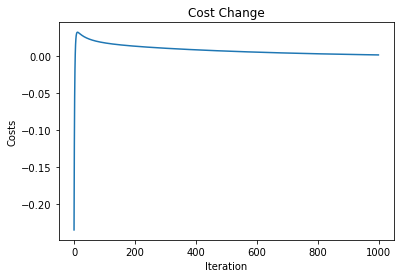

In [ ]:
print(max(pack['Costs']))
x = range(0,len(pack['Costs']))
y = pack['Costs']
plt.plot(x,y)
plt.xlabel("Iteration")
plt.ylabel("Costs")
plt.title('Cost Change')
plt.show()

In [ ]:
test_set_Y

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0.])

In [ ]:
prediction

array([[1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

In [ ]:
print(prediction.shape[1] - np.sum(abs(prediction - test_set_Y)), np.sum(abs(prediction - test_set_Y)))
#print((-1/m)*np.sum(-Y*np.log(a)+(1-Y)*np.log(1-a)))
print(prediction.shape, test_set_Y.shape)
print(type(prediction), type(test_set_Y))

39.0 14.0
(1, 53) (53,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
np.array(pack['Costs'])

array([-1.83095482e-01, -9.60550905e-02, -4.86287007e-02, -2.23863805e-02,
       -7.71538441e-03,  5.08021491e-04,  5.09085707e-03,  7.60218630e-03,
        8.93045315e-03,  9.58265361e-03,  9.84942328e-03,  9.89778257e-03,
        9.82382016e-03,  9.68281943e-03,  9.50655448e-03,  9.31324344e-03,
        9.11328458e-03,  8.91256490e-03,  8.71436969e-03,  8.52048503e-03,
        8.33183454e-03,  8.14884708e-03,  7.97166932e-03,  7.80028834e-03,
        7.63460252e-03,  7.47446242e-03,  7.31969429e-03,  7.17011356e-03,
        7.02553260e-03,  6.88576504e-03,  6.75062820e-03,  6.61994442e-03,
        6.49354164e-03,  6.37125377e-03,  6.25292068e-03,  6.13838821e-03,
        6.02750802e-03,  5.92013741e-03,  5.81613920e-03,  5.71538151e-03,
        5.61773757e-03,  5.52308557e-03,  5.43130844e-03,  5.34229369e-03,
        5.25593325e-03,  5.17212330e-03,  5.09076408e-03,  5.01175977e-03,
        4.93501834e-03,  4.86045136e-03,  4.78797391e-03,  4.71750444e-03,
        4.64896460e-03,  

In [ ]:
pack.keys()
np.array(pack['Costs'])

array([        nan, -0.13202802,  0.0478104 ,  0.05764524,  0.05534651,
        0.05364121,  0.0520158 ,  0.05048204,  0.0490296 ,  0.04765063,
        0.04633833,  0.04508681,  0.04389093,  0.04274618,  0.04164859,
        0.04059461,  0.0395811 ,  0.03860524,  0.03766449,  0.03675656,
        0.03587935,  0.03503099,  0.03420975,  0.03341405,  0.03264243,
        0.03189359,  0.03116627,  0.03045937,  0.02977182,  0.02910267,
        0.02845101,  0.02781602,  0.0271969 ,  0.02659295,  0.02600349,
        0.02542788,  0.02486555,  0.02431593,  0.02377851,  0.02325281,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [ ]:
'''First:
 RuntimeWarning: invalid value encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until '''

'''
  After turn into arrays and normalize:
  /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
'''

In [ ]:
index_img = "/content/drive/My Drive/Lolita_x_Miolo/miolo_converted/77.png"
image = ndimage.imread(index_img, flatten=False)
image.shape
#plt.imshow(np.array(test_set.iloc[:-1, index_img].apply(int)).reshape(64, 64, 3))
# plt.imshow(np.array()
#pred_test = predict(pack, np.array(test_set.iloc[:-1,0]))
# pred_test = predict(pack, np.array(ndimage.imread(index_img, flatten=False)))
#print(test_set.iloc[-1, index_img], test_set.shape, pred_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


(64, 64, 3)

In [ ]:
#test_set = test_set.drop(test_set.index[12289])
test_set

,77,61.1,18.1,88.1,74.1,170,163,16.1,51.1,29.1,32.1,83.1,25,60.1,26,145,92,33.1,110,36.1,67.1,130,171,118,4.1,60,129,31,54,142,23,35,22.1,2,128,84.1,15,72.1,35.1,11,1,68.1,117,20.1,98,150,103,91.1,15.1,45,87,127,70.1
0,19.0,75.0,147.0,6.0,249.0,56.0,8.0,95.0,72.0,42.0,65.0,253.0,232.0,134.0,114.0,68.0,60.0,35.0,64.0,46.0,143.0,16.0,20.0,198.0,25.0,128.0,138.0,118.0,123.0,75.0,50.0,71.0,50.0,193.0,176.0,172.0,126.0,162.0,38.0,190.0,193.0,48.0,164.0,38.0,55.0,75.0,18.0,192.0,73.0,62.0,52.0,61.0,249.0
1,6.0,60.0,143.0,5.0,253.0,56.0,3.0,96.0,104.0,34.0,50.0,255.0,228.0,157.0,115.0,51.0,26.0,24.0,50.0,42.0,138.0,4.0,5.0,201.0,20.0,207.0,143.0,140.0,130.0,68.0,21.0,43.0,48.0,198.0,180.0,176.0,166.0,169.0,42.0,176.0,195.0,50.0,167.0,64.0,49.0,49.0,4.0,193.0,62.0,38.0,34.0,36.0,249.0
2,19.0,56.0,151.0,8.0,254.0,64.0,9.0,88.0,103.0,29.0,28.0,254.0,223.0,149.0,105.0,39.0,22.0,14.0,50.0,27.0,144.0,14.0,16.0,198.0,23.0,187.0,158.0,125.0,128.0,61.0,19.0,30.0,54.0,196.0,181.0,182.0,157.0,171.0,29.0,157.0,194.0,60.0,158.0,43.0,41.0,39.0,15.0,195.0,60.0,29.0,32.0,33.0,249.0
3,16.0,80.0,143.0,12.0,244.0,49.0,7.0,96.0,64.0,40.0,59.0,248.0,255.0,133.0,115.0,51.0,60.0,35.0,60.0,42.0,143.0,15.0,17.0,199.0,25.0,117.0,133.0,120.0,128.0,72.0,50.0,68.0,50.0,193.0,175.0,172.0,124.0,147.0,34.0,191.0,191.0,29.0,167.0,33.0,58.0,71.0,19.0,191.0,74.0,57.0,45.0,63.0,250.0
4,6.0,65.0,143.0,10.0,248.0,46.0,2.0,95.0,94.0,35.0,49.0,251.0,254.0,158.0,115.0,39.0,32.0,24.0,46.0,43.0,137.0,3.0,5.0,201.0,19.0,208.0,145.0,143.0,137.0,65.0,24.0,46.0,46.0,197.0,179.0,174.0,165.0,158.0,39.0,178.0,195.0,33.0,169.0,66.0,53.0,48.0,10.0,194.0,65.0,37.0,31.0,43.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,95.0,17.0,20.0,155.0,181.0,26.0,48.0,72.0,250.0,31.0,45.0,184.0,124.0,112.0,255.0,79.0,10.0,9.0,11.0,46.0,94.0,107.0,94.0,208.0,25.0,197.0,26.0,89.0,9.0,88.0,6.0,13.0,25.0,180.0,100.0,14.0,40.0,15.0,19.0,31.0,195.0,12.0,201.0,6.0,49.0,47.0,105.0,24.0,87.0,30.0,111.0,77.0,98.0
12284,65.0,32.0,33.0,156.0,172.0,27.0,58.0,67.0,254.0,28.0,33.0,178.0,87.0,105.0,255.0,71.0,9.0,7.0,15.0,35.0,95.0,106.0,79.0,211.0,22.0,222.0,32.0,81.0,11.0,98.0,9.0,17.0,38.0,175.0,73.0,12.0,50.0,16.0,15.0,12.0,194.0,15.0,195.0,15.0,38.0,37.0,115.0,27.0,85.0,31.0,127.0,89.0,96.0
12285,107.0,13.0,21.0,153.0,179.0,38.0,71.0,66.0,241.0,31.0,49.0,187.0,93.0,154.0,255.0,73.0,13.0,16.0,15.0,26.0,100.0,94.0,95.0,211.0,29.0,111.0,35.0,92.0,13.0,89.0,12.0,21.0,31.0,171.0,167.0,21.0,58.0,23.0,17.0,97.0,190.0,12.0,215.0,15.0,63.0,66.0,102.0,13.0,107.0,44.0,104.0,78.0,104.0
12286,93.0,15.0,20.0,155.0,182.0,29.0,60.0,70.0,251.0,31.0,40.0,185.0,101.0,112.0,255.0,64.0,8.0,11.0,15.0,27.0,95.0,99.0,92.0,209.0,26.0,180.0,26.0,85.0,8.0,97.0,7.0,11.0,29.0,172.0,100.0,14.0,57.0,14.0,19.0,30.0,194.0,10.0,208.0,13.0,51.0,45.0,106.0,11.0,104.0,34.0,105.0,80.0,101.0
